# Import packages

In [19]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pathlib import Path

import xarray as xr
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

from camels_spat2nh import *

# Get the current working directory of the notebook
CURRENT_DIR = os.getcwd()
# Add the parent directory of the notebook to the Python path
# root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
ROOT_DIR = os.path.abspath(CURRENT_DIR)
sys.path.append(ROOT_DIR)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Print packages version
print(f'xarray version: {xr.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'yaml version: {yaml.__version__}')

xarray version: 2023.1.0
pandas version: 2.0.3
numpy version: 1.25.2
yaml version: 6.0.1


# Constants

In [21]:
basin_id = '14400000'
country = 'USA'

basin_folder = f'{country}_{basin_id}'

# Load Data

## Util data

In [22]:
data_dir_dict, data_gen_dict = load_util_data(CURRENT_DIR)
# display(
#     data_dir_dict,
#     data_gen_dict
# )

In [23]:
cspat_data_path = Path(data_dir_dict['data_dir_camels_spat']) / 'basin_data'
relative_path_forcing = data_dir_dict['relative_path_forcing']
countries = data_gen_dict['countries']
data_sources = data_gen_dict['data_sources']

# display(
#     cspat_data_path,
#     countries
# )

## Find basin and list of forcing files

In [24]:
# List all the folders in the basin_data directory
basin_data_folders = [str(f).split('/')[-1] for f in cspat_data_path.iterdir() if f.is_dir()]
# Check if basin_folder exists in the basin_data directory
if basin_folder not in basin_data_folders:
    raise FileNotFoundError(f'{basin_folder} folder not found in {cspat_data_path}')
else:
    print(f'{basin_folder} folder found in {cspat_data_path}')
    basin_folder_path = cspat_data_path / basin_folder / relative_path_forcing

USA_14400000 folder found in /project/gwf/gwf_cmt/wknoben/camels_spat/camels-spat-data/basin_data


In [25]:
# Group the files in the basin_folder by the data_source
# if contains data_source in the name
basin_files = {}
for data_source in data_sources:
    basin_files[data_source] = sorted([f for f in basin_folder_path.iterdir() if data_source in str(f)])

# Print number of files in each data_source
for data_source in data_sources:
    print(f'Number of files in {data_source}: {len(basin_files[data_source])}')

Number of files in ERA5: 640
Number of files in EM_Earth: 603
Number of files in RDRS: 468
Number of files in daymet: 44


In [26]:
# Select the first file for each data_source
basin_data = {}
for data_source in data_sources:
    basin_data[data_source] = xr.open_dataset(basin_files[data_source][0])

In [27]:
# # Display the data variables in the basin_data
# for data_source in data_sources:
#     display(data_source, basin_data[data_source])
#     # List of Data Variables
#     print(f'Data Variables in {data_source}: {list(basin_data[data_source].data_vars)}')

In [30]:
basin_data['daymet']

<xarray.Dataset>
Dimensions:    (time: 366, hru: 1, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 1980-12-31T12:00:00
Dimensions without coordinates: hru, nv
Data variables:
    latitude   (hru) float64 ...
    longitude  (hru) float64 ...
    hruId      (hru) float64 ...
    prcp       (time, hru) float32 ...
    tmax       (time, hru) float32 ...
    tmin       (time, hru) float32 ...
    srad       (time, hru) float32 ...
    vp         (time, hru) float32 ...
    dayl       (time, hru) float32 ...
    pet        (time, hru) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
Attributes:
    Conventions:    CF-1.6
    Author:         The data were written by CAMELS-spat workflow
    License:        GPLv3+; Originla license: No license from original file i...
    History:        Created Wed Jun 19 22:49:50 2024by EASYMORE nc_remapper; ...
    easymore_hash:  835a10df80cccc9ceaef12a22497986cfa7f87a6f15cba6e6a34f7276...
    Source:         Remapped by EASYMORE nc_remapper from original file: /gpf...

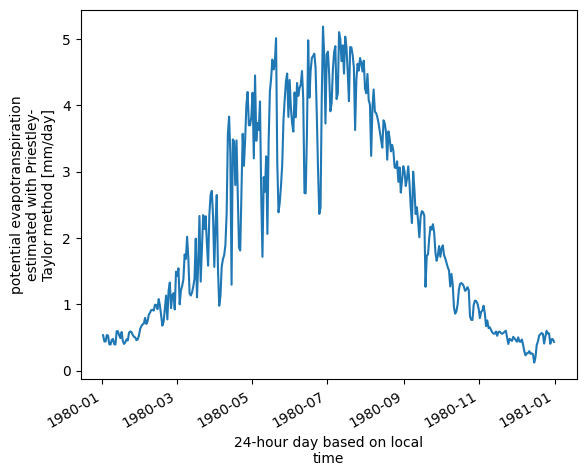

In [29]:
basin_data['daymet'].pet.plot()